In [1]:
#importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

## EDA for shopify data

* Performance by refferals done by social media platform 
* User Enagement analysis
* Understanding user behavior across different times in a day

In [2]:
# Reading shopify data using pandas
shopify_data = pd.read_csv("shopify_data_seller2.csv", parse_dates=["hour"])
shopify_data.head()

,page_type,location_country,referrer_host,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name
0,Homepage,Dominica,jones-shelton.com,Mac OS X,2020-10-17 17:00:00,0,0,0,1,1,0.000000,1.0,Desktop,Unknown,NaN
1,Homepage,Gabon,Unknown,iOS,2019-09-28 06:00:00,0,0,0,1,1,0.000000,1.0,Mobile,NaN,NaN
2,Unknown,Bosnia and Herzegovina,Unknown,Linux,2021-01-07 19:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
3,Homepage,Dominica,Unknown,Mac OS X,2021-06-27 09:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
4,Product,Saint Helena,l.instagram.com,Android,2020-11-14 10:00:00,2,3,4,7,14,0.285714,0.0,Mobile,Social,Instagram


In [3]:
#infomation about shopify data
shopify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   page_type            25000 non-null  object        
 1   location_country     25000 non-null  object        
 2   referrer_host        25000 non-null  object        
 3   ua_os                25000 non-null  object        
 4   hour                 25000 non-null  datetime64[ns]
 5   total_orders_placed  25000 non-null  int64         
 6   total_checkouts      25000 non-null  int64         
 7   total_carts          25000 non-null  int64         
 8   total_sessions       25000 non-null  int64         
 9   total_pageviews      25000 non-null  int64         
 10  total_conversion     25000 non-null  float64       
 11  total_bounce_rate    25000 non-null  float64       
 12  ua_form_factor       25000 non-null  object        
 13  referrer_source      10491 non-

In [4]:
#Describing Shopify Data
shopify_data.describe(include="all")

,page_type,location_country,referrer_host,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name
count,25000,25000,25000,25000,25000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000,10491,4972
unique,9,62,44,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,7
top,Homepage,Bosnia and Herzegovina,Unknown,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mobile,Unknown,Instagram
freq,15265,6688,14509,7022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14105,3548,2388
mean,NaN,NaN,NaN,NaN,2020-08-22 21:43:47.712000256,0.414480,0.623280,0.828200,2.039680,2.871880,0.059554,0.896619,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2019-07-11 17:00:00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2019-12-05 02:30:00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2020-09-07 17:00:00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2021-03-11 02:15:00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,2022-02-15 16:00:00,11.000000,19.000000,26.000000,29.000000,57.000000,0.857143,1.000000,NaN,NaN,NaN


# Objective 1: Performance by refferals done by social media platform 

* The main objective of this code is to identify which platforms drive the most traffic and provides key metrics (like bounce rate and conversion) to evaluate their effectiveness.

In [5]:
shopify_data.columns

Index(['page_type', 'location_country', 'referrer_host', 'ua_os', 'hour',
       'total_orders_placed', 'total_checkouts', 'total_carts',
       'total_sessions', 'total_pageviews', 'total_conversion',
       'total_bounce_rate', 'ua_form_factor', 'referrer_source',
       'referrer_name'],
      dtype='object')

               total_sessions  total_conversion  total_bounce_rate
referrer_name                                                     
Google                   4033        139.630278        1315.353845
Facebook                 4007        151.492105         626.825786
Instagram                3805        105.515211        2210.739665
Bing                      231          6.050393          29.907266
Yandex                     55          1.785714          26.222222


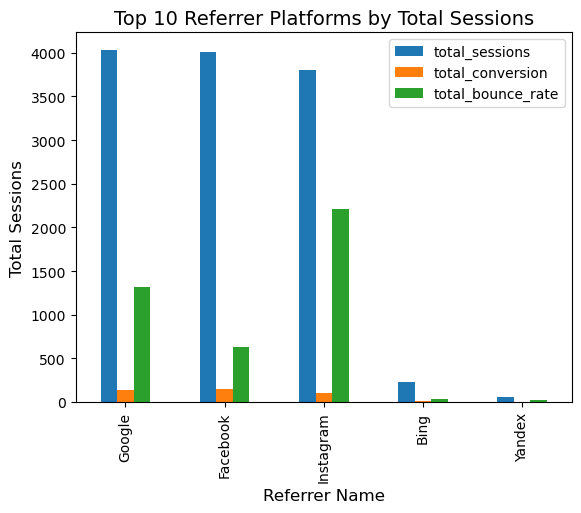

In [6]:
social_platform = (
    shopify_data.groupby(["referrer_name"])[["total_sessions", "total_conversion", "total_bounce_rate"]]
    .sum()
    .nlargest(5, "total_sessions")
)
print(social_platform)
social_platform.plot(kind="bar")
plt.title("Top 10 Referrer Platforms by Total Sessions", fontsize=14)
plt.xlabel("Referrer Name", fontsize=12)
plt.ylabel("Total Sessions", fontsize=12)
plt.show()

Explanation of the charts:
The primary goal of this code is to analyze the performance of referrer platforms (like Google, Instagram, Yandex, etc.) and identify which platforms are driving the most user engagement (total sessions) to the website. Knowing which platforms bring the most sessions helps in optimizing marketing efforts. It shows that Google generates a high number of sessions, so the  might focus more on social media campaigns.

In [7]:
#Frequency on the referral platform that has the most ocurrance
freq_shop= shopify_data["referrer_name"].value_counts()
freq_shop

referrer_name
Instagram     2388
Google        1551
Facebook       892
Yahoo!          43
Bing            42
Yandex          29
DuckDuckGo      27
Name: count, dtype: int64

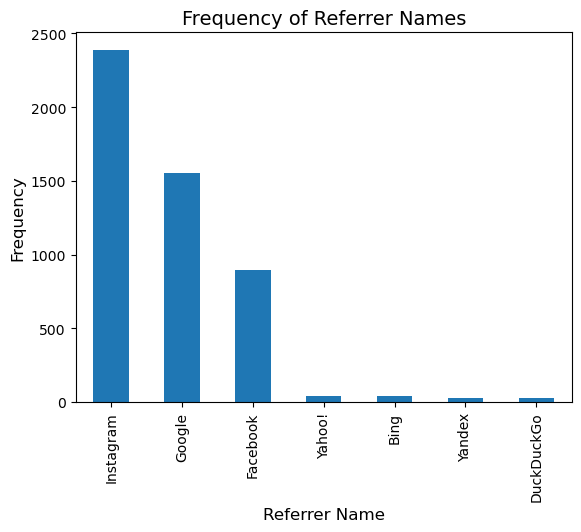

In [8]:
#ploting The freqency
freq_shop.plot(kind="bar")
plt.title("Frequency of Referrer Names", fontsize=14)
plt.xlabel("Referrer Name", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Objective 2:User Engagement Analysis
Understand user interaction across page types.

In [9]:
shopify_data.dtypes

page_type                      object
location_country               object
referrer_host                  object
ua_os                          object
hour                   datetime64[ns]
total_orders_placed             int64
total_checkouts                 int64
total_carts                     int64
total_sessions                  int64
total_pageviews                 int64
total_conversion              float64
total_bounce_rate             float64
ua_form_factor                 object
referrer_source                object
referrer_name                  object
dtype: object

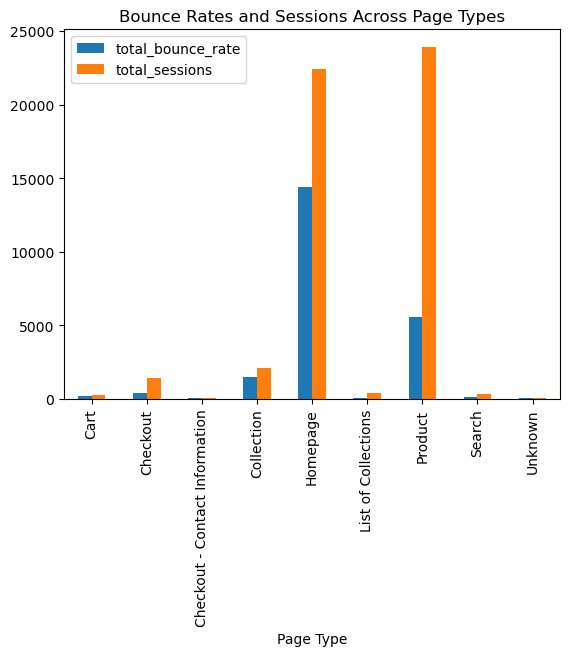

In [10]:
user_engage = shopify_data.groupby("page_type")[["total_bounce_rate","total_sessions"]].sum()
user_engage.plot(kind="bar",rot=90)
plt.xlabel("Page Type")
plt.title("Bounce Rates and Sessions Across Page Types")
plt.show()

The above plot shows that there is need to optimize the Homepage to reduce bounce rates and enhance user engagement while capitalizing on the interest generated on Product pages to improve conversions.

# Objective 3: Understanding user behavior across different times of the day

In [11]:
#To know from what year to what year the data was collected
print(shopify_data["hour"].min())
print(shopify_data["hour"].max())

2019-07-11 17:00:00
2022-02-15 16:00:00


In [12]:
shopify_data["user_hour"] = shopify_data["hour"].dt.hour
shopify_data["is_working_days"] = shopify_data["hour"].dt.weekday.isin([0,1,2,3,4])
shopify_data["is_weekend"] = shopify_data["hour"].dt.dayofweek.isin([5, 6])

In [13]:
group_hour=shopify_data.groupby("user_hour")[['is_working_days', 'is_weekend']].sum()
group_hour

,is_working_days,is_weekend
user_hour,,
0,732,314
1,735,276
2,730,288
3,759,280
4,763,308
5,746,285
6,736,281
7,724,302
8,701,303


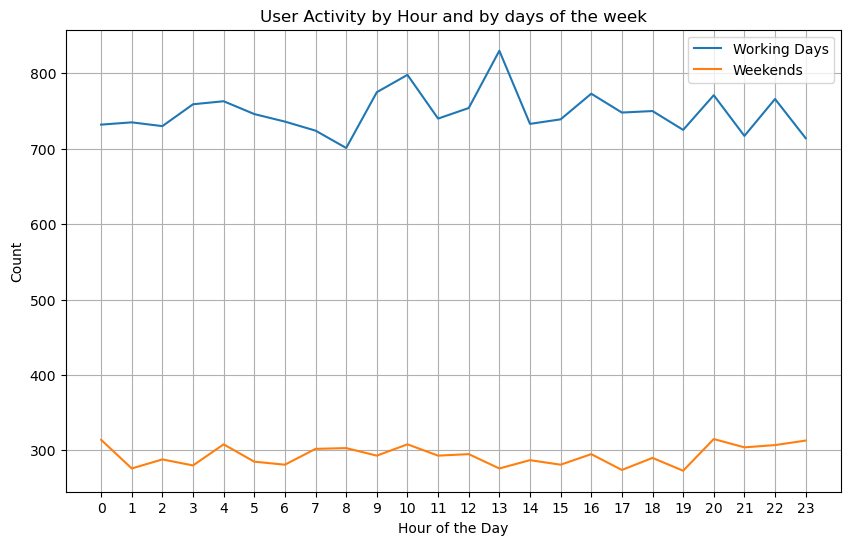

In [22]:
# plotting the time spend by users during weekends and working days
plt.figure(figsize=(10, 6))
plt.plot(group_hour.index, group_hour['is_working_days'], label='Working Days')
plt.plot(group_hour.index, group_hour['is_weekend'], label='Weekends')
plt.xticks(ticks=range(0, 24), fontsize=10)
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('User Activity by Hour and by days of the week')
plt.legend()
plt.grid(True)
plt.show()

The analysis of user activity by hour, differentiated between working days and weekends, reveals distinct patterns in user engagement. On working days, there is a significantly higher level of activity, likely driven by work-related tasks. In contrast, weekends show consistently lower user activity, suggesting that users spend more time on leisure activities and less on the platform.

## Vaccine Distribution EDA

# Objectives
* Total Dosage Admistrated
* Understanding Correlation between the first vaccine and the second

In [23]:
covid_vaccine = pd.read_csv("astrazeneca-and-moderna-vaccination-doses-by-state.csv")
covid_vaccine.head()

,State,AstraZeneca (First dose),AstraZeneca (Second dose),Moderna (First Dose)
0,Akwa Ibom,"41,134","26,626",27174
1,Bayelsa,"22,693","9,107",9296
2,Cross River,"55,952","43,861",51562
3,Delta,"54,972","33,659",24234
4,Edo,"44,751","31,609",59780


In [31]:
covid_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   State                      6 non-null      object
 1   AstraZeneca (First dose)   6 non-null      int32 
 2   AstraZeneca (Second dose)  6 non-null      int32 
 3   Moderna (First Dose)       6 non-null      int64 
dtypes: int32(2), int64(1), object(1)
memory usage: 276.0+ bytes


In [30]:
#Removing commas from the values for better analysis
covid_vaccine["AstraZeneca (First dose)"] = covid_vaccine["AstraZeneca (First dose)"].str.replace(",", "").astype(int)
covid_vaccine["AstraZeneca (Second dose)"] = covid_vaccine["AstraZeneca (Second dose)"].str.replace(",", "").astype(int)

AttributeError: Can only use .str accessor with string values!

# Objective 1: Total Dosage Admistrated

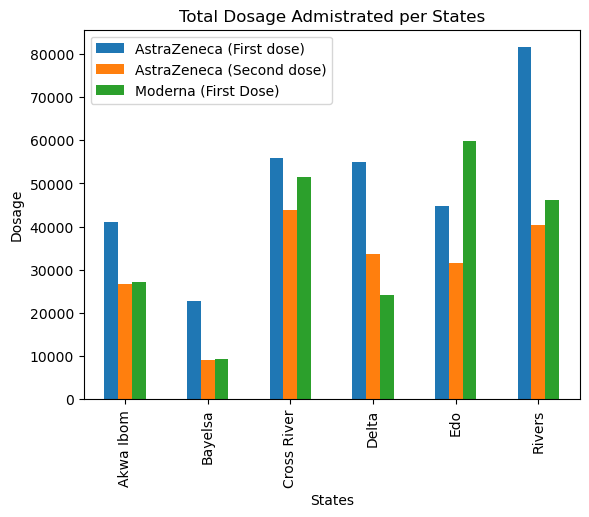

In [49]:
total_dose = covid_vaccine.groupby("State")[["AstraZeneca (First dose)","AstraZeneca (Second dose)","Moderna (First Dose)"]].sum()
total_dose.plot(kind="bar")
plt.title("Total Dosage Admistrated per States")
plt.xlabel("States")
plt.ylabel("Dosage")
plt.show()

## Objective 2: Understanding Correlation between the first vaccine and the second

In [71]:
corr_1_2= covid_vaccine[["AstraZeneca (First dose)","AstraZeneca (Second dose)","Moderna (First Dose)"]]
corr_1_2

,AstraZeneca (First dose),AstraZeneca (Second dose),Moderna (First Dose)
0,41134,26626,27174
1,22693,9107,9296
2,55952,43861,51562
3,54972,33659,24234
4,44751,31609,59780
5,81535,40354,46158


In [72]:
result = corr_1_2.corr()
result

,AstraZeneca (First dose),AstraZeneca (Second dose),Moderna (First Dose)
AstraZeneca (First dose),1.000000,0.846752,0.553631
AstraZeneca (Second dose),0.846752,1.000000,0.763437
Moderna (First Dose),0.553631,0.763437,1.000000


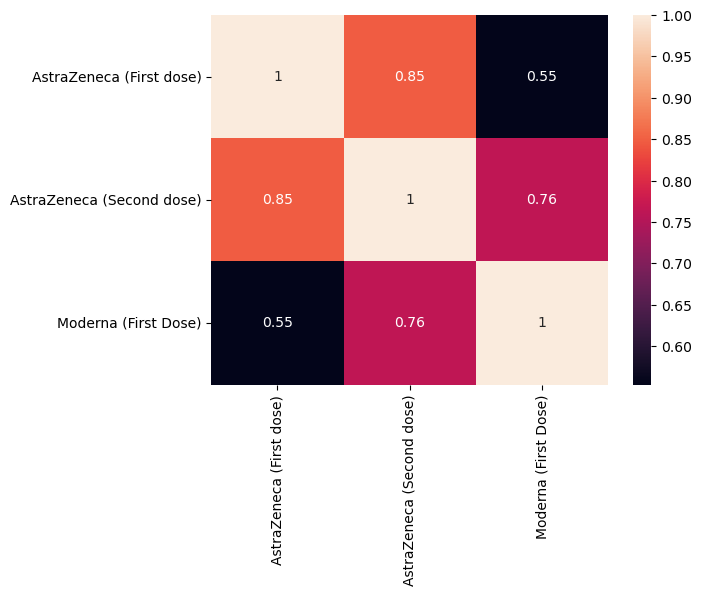

In [73]:
heat= sns.heatmap(corr_1_2.corr(), annot = True)

The high correlation suggests that a significant proportion of individuals who received the first dose of AstraZeneca are also following up with the second dose. This is a positive indicator for public health as it shows good adherence to the complete vaccination regimen.

## Covid_19 Distribution EDA

In [60]:
covid_distribute = pd.read_csv("distribution-of-covid-19-fully-vaccinated-population-in-nigeria.csv")
covid_distribute

,State,Population,Total Vaccinated Population,First Dose (Partially Vaccinated),Second Dose (Fully Vaccinated)
0,Abia,"3,727,347",56852,"34,029","22,823"
1,Adamawa,"4,248,436",68510,"39,852","28,658"
2,Akwa Ibom,"5,482,177",66166,"41,134","25,032"
3,Anambra,"5,527,809",60382,"41,334","19,048"
4,Bauchi,"6,537,314",97045,"65,625","31,420"
5,Bayelsa,"2,277,961",30774,"22,693","8,081"
6,Benue,"5,741,815",102626,"69,323","33,303"
7,Borno,"5,860,183",64199,"40,436","23,763"
8,Cross River,"3,866,269",93399,"55,952","37,447"
9,Delta,"5,663,362",83952,"54,972","28,980"


In [61]:
covid_distribute["Population"] = covid_distribute["Population"].str.replace(",", "").astype(int)
covid_distribute["First Dose (Partially Vaccinated)"] = covid_distribute["First Dose (Partially Vaccinated)"].str.replace(",", "").astype(int)
covid_distribute["Second Dose (Fully Vaccinated)"] = covid_distribute["Second Dose (Fully Vaccinated)"].str.replace(",", "").astype(int)

In [62]:
covid_distribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   State                              37 non-null     object
 1   Population                         37 non-null     int32 
 2   Total Vaccinated Population        37 non-null     int64 
 3   First Dose (Partially Vaccinated)  37 non-null     int32 
 4   Second Dose (Fully Vaccinated)     37 non-null     int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 1.1+ KB


# Objective 1: Top 10 States with the Highest Vaccination

In [64]:
# Top 10 the state with the highest vaccination
top10_high_vaccination= covid_distribute.groupby('State').sum()
top_10_vaccination = top10_high_vaccination['Total Vaccinated Population'].nlargest(10)
top_10_vaccination

State
Lagos                        647788
Federal Capital Territory    249284
Ogun                         181662
Kano                         181145
Kaduna                       176183
Oyo                          163636
Rivers                       116969
Katsina                      107550
Kwara                        106195
Benue                        102626
Name: Total Vaccinated Population, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_12604\748945935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


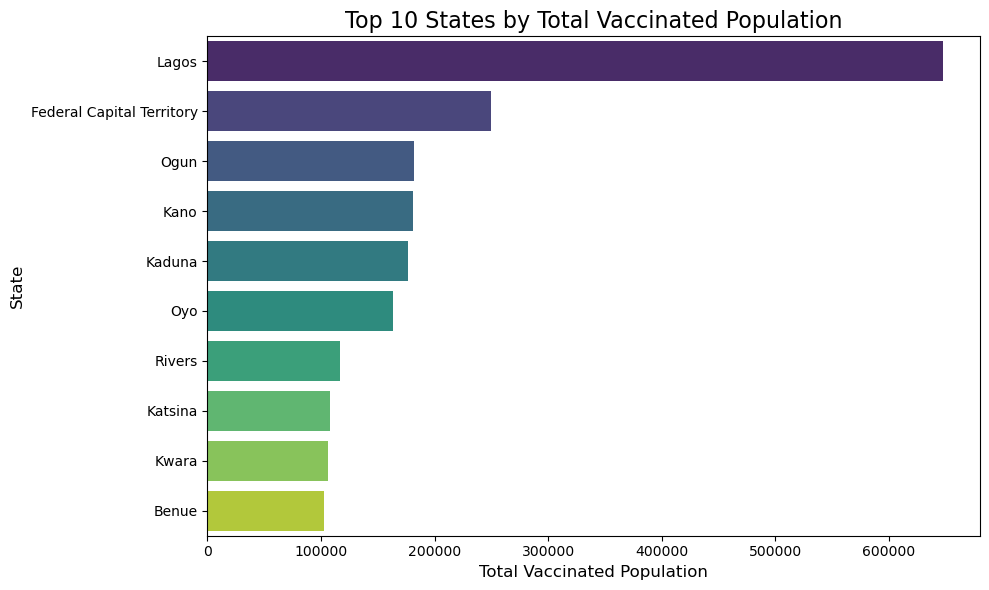

In [65]:
data = {
    'State': top_10_vaccination.index,
    'Total Vaccinated Population': top_10_vaccination.values
}
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total Vaccinated Population', 
    y='State', 
    data=data,
    palette='viridis'
)
# Customizing the plot
plt.title('Top 10 States by Total Vaccinated Population', fontsize=16)
plt.xlabel('Total Vaccinated Population', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

## Objective 2: Correlation between the First Dosage and the Second Dosage

In [67]:
covid_distribute.columns

Index(['State', 'Population', 'Total Vaccinated Population',
       'First Dose (Partially Vaccinated)', 'Second Dose (Fully Vaccinated)'],
      dtype='object')

In [68]:
corr_vac= covid_distribute[["First Dose (Partially Vaccinated)","Second Dose (Fully Vaccinated)"]]
corr_vac

,First Dose (Partially Vaccinated),Second Dose (Fully Vaccinated)
0,34029,22823
1,39852,28658
2,41134,25032
3,41334,19048
4,65625,31420
5,22693,8081
6,69323,33303
7,40436,23763
8,55952,37447
9,54972,28980


In [70]:
corr_vac.corr()

,First Dose (Partially Vaccinated),Second Dose (Fully Vaccinated)
First Dose (Partially Vaccinated),1.000000,0.985896
Second Dose (Fully Vaccinated),0.985896,1.000000


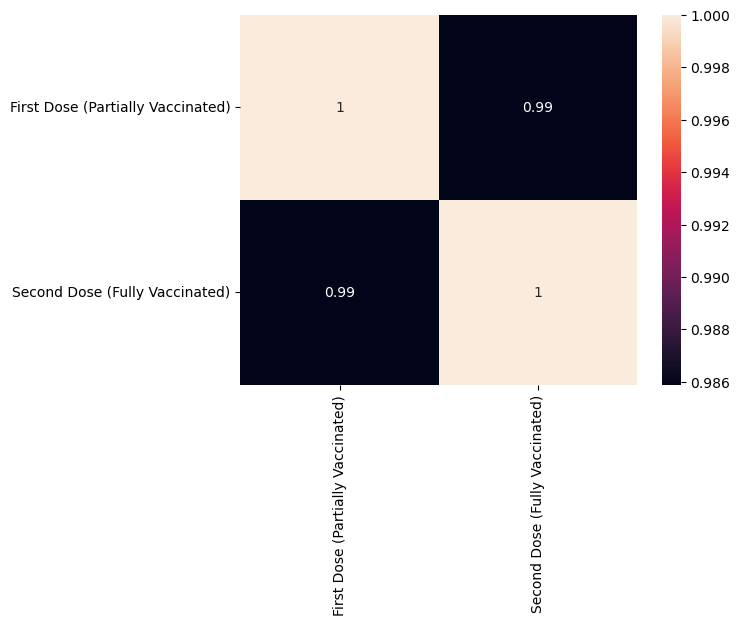

In [74]:
heat_vac= sns.heatmap(corr_vac.corr(), annot = True)

## Covid_19 Data EDA

In [75]:
covid_data = pd.read_excel('nga_subnational_covid19_hera (1).xlsx',index_col = 0)
covid_data.head()

,DATE,ISO_3,PAYS,ID_PAYS,REGION,ID_REGION,CONTAMINES,DECES,GUERIS,CONTAMINES_FEMME,CONTAMINES_HOMME,CONTAMINES_GENRE_NON_SPECIFIE,SOURCE
ID,,,,,,,,,,,,,
1,2020-02-27,NGA,Nigéria,15,Abia,170,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
2,2020-02-27,NGA,Nigéria,15,Adamawa,171,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
3,2020-02-27,NGA,Nigéria,15,Akwa Ibom,172,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
4,2020-02-27,NGA,Nigéria,15,Anambra,173,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
5,2020-02-27,NGA,Nigéria,15,Bauchi,174,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control


In [76]:
covid_data.columns

Index(['DATE', 'ISO_3', 'PAYS', 'ID_PAYS', 'REGION', 'ID_REGION', 'CONTAMINES',
       'DECES', 'GUERIS', 'CONTAMINES_FEMME', 'CONTAMINES_HOMME',
       'CONTAMINES_GENRE_NON_SPECIFIE', 'SOURCE'],
      dtype='object')

In [78]:
# Renaming Columns 
covid_data.rename(columns = {
            'ID': 'ID',
            'DATE' : 'DATE',
            'ISO_3' : 'Country_ISO_3',
            'PAYS' :'Country',
            'ID_PAYS' : 'Country_ID',
            'REGION' :'Region',
            'ID_REGION' : 'Region_id',
            'CONTAMINES' : 'Confirmed_cases',
            'DECES' :'Death',
            'GUERIS': 'Recovered',
            'CONTAMINES_FEMME' : 'Contaminated (Infected) Women',
            'CONTAMINES_HOMME' : 'Contaminated (Infected) Men',
            'CONTAMINES_GENRE_NON_SPECIFIE': 'Contaminated (Infected) Unspecified Gender',
            'SOURCE':'Source'},inplace = True)

In [79]:
covid_data.columns

Index(['DATE', 'Country_ISO_3', 'Country', 'Country_ID', 'Region', 'Region_id',
       'Confirmed_cases', 'Death', 'Recovered',
       'Contaminated (Infected) Women', 'Contaminated (Infected) Men',
       'Contaminated (Infected) Unspecified Gender', 'Source'],
      dtype='object')

In [80]:
covid_data.describe(include='all')

,DATE,Country_ISO_3,Country,Country_ID,Region,Region_id,Confirmed_cases,Death,Recovered,Contaminated (Infected) Women,Contaminated (Infected) Men,Contaminated (Infected) Unspecified Gender,Source
count,26866,26866,26866,26866.0,26866,26866.00000,26802.000000,26463.000000,26280.000000,17734.000000,17734.000000,23663.000000,26866
unique,NaN,1,1,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NGA,Nigéria,NaN,Abia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nigeria Centre for Disease Control
freq,NaN,26866,26866,NaN,707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18767
mean,2021-02-14 00:00:00,NaN,NaN,15.0,NaN,188.50000,9.440452,0.118467,8.714574,2.197023,1.259276,8.102481,NaN
min,2020-02-27 00:00:00,NaN,NaN,15.0,NaN,170.00000,-1.000000,0.000000,-46.000000,0.000000,-90.000000,-1.000000,NaN
25%,2020-08-21 00:00:00,NaN,NaN,15.0,NaN,179.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2021-02-14 00:00:00,NaN,NaN,15.0,NaN,188.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,2021-08-10 00:00:00,NaN,NaN,15.0,NaN,198.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,2022-02-02 00:00:00,NaN,NaN,15.0,NaN,207.00000,3393.000000,79.000000,10946.000000,696.000000,493.000000,3393.000000,NaN


In [82]:
new_covid_data = covid_data[['Region','Confirmed_cases','Death','Recovered','Contaminated (Infected) Women','Contaminated (Infected) Men']]
new_covid_data.head(100)

,Region,Confirmed_cases,Death,Recovered,Contaminated (Infected) Women,Contaminated (Infected) Men
ID,,,,,,
1,Abia,0.0,0.0,0.0,0.0,0.0
2,Adamawa,0.0,0.0,0.0,0.0,0.0
3,Akwa Ibom,0.0,0.0,0.0,0.0,0.0
4,Anambra,0.0,0.0,0.0,0.0,0.0
5,Bauchi,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
96,Kano,0.0,0.0,0.0,0.0,0.0
97,Katsina,0.0,0.0,0.0,0.0,0.0
98,Kebbi,0.0,0.0,0.0,0.0,0.0


In [83]:
group_by_region = new_covid_data.groupby(by='Region').agg(['sum','min'])
group_by_region

Confirmed_cases       Death      Recovered        \
                                      sum  min    sum  min       sum   min   
Region                                                                       
Abia                               2152.0  0.0   34.0  0.0    2112.0   0.0   
Adamawa                            1203.0  0.0   32.0  0.0    1103.0   0.0   
Akwa Ibom                          4625.0  0.0   44.0  0.0    4494.0   0.0   
Anambra                            2743.0 -1.0   19.0  0.0    2678.0   0.0   
Bauchi                             1936.0  0.0   24.0  0.0    1878.0   0.0   
Bayelsa                            1305.0  0.0   28.0  0.0    1277.0   0.0   
Benue                              2129.0  0.0   25.0  0.0    1764.0   0.0   
Borno                              1629.0  0.0   44.0  0.0    1580.0 -11.0   
Cross River                         778.0  0.0   25.0  0.0     746.0   0.0   
Delta                              5328.0  0.0  111.0  0.0    5170.0   0.0   
Ebonyi                             2064.0  0.0   32.0  0.0    2004.0   0.0   
Edo                                7672.0  0.0  320.0  0.0    7335.0 -46.0   
Ekiti                              1978.0  0.0   28.0  0.0    1919.0   0.0   
Enugu                              2952.0  0.0   29.0  0.0    2910.0   0.0   
Federal Capital Territory         28187.0  0.0  247.0  0.0   27405.0   0.0   
Gombe                              3270.0  0.0   64.0  0.0    3103.0   0.0   
Imo                                2442.0  0.0   58.0  0.0    2268.0   0.0   
Jigawa                              664.0  0.0   18.0  0.0     642.0   0.0   
Kaduna                            11185.0  0.0   89.0  0.0   11073.0   0.0   
Kano                               4919.0  0.0  126.0  0.0    4726.0   0.0   
Katsina                            2399.0  0.0   37.0  0.0    2339.0   0.0   
Kebbi                               480.0  0.0   16.0  0.0     454.0   0.0   
Kogi                                  5.0  0.0    2.0  0.0       3.0   0.0   
Kwara                              4541.0  0.0   64.0  0.0    4175.0   0.0   
Lagos                             98366.0  0.0  769.0  0.0   80066.0   0.0   
Nasarawa                           2703.0  0.0   39.0  0.0    2345.0   0.0   
Niger                              1142.0  0.0   20.0  0.0     998.0   0.0   
Non spécifié                          0.0  0.0    0.0  0.0       0.0   0.0   
Ogun                               5798.0  0.0   82.0  0.0    5705.0   0.0   
Ondo                               5143.0  0.0  107.0  0.0    4673.0   0.0   
Osun                               3276.0  0.0   92.0  0.0    3127.0   0.0   
Oyo                               10196.0  0.0  201.0  0.0    9634.0   0.0   
Plateau                           10227.0  0.0   75.0  0.0   10149.0   0.0   
Rivers                            16422.0  0.0  154.0  0.0   16148.0   0.0   
Sokoto                              811.0  0.0   28.0  0.0     783.0   0.0   
Taraba                             1469.0  0.0   34.0  0.0    1377.0   0.0   
Yobe                                509.0  0.0    9.0  0.0     490.0   0.0   
Zamfara                             375.0  0.0    9.0  0.0     366.0   0.0   

                          Contaminated (Infected) Women       \
                                                    sum  min   
Region                                                         
Abia                                                0.0  0.0   
Adamawa                                             0.0  0.0   
Akwa Ibom                                           0.0  0.0   
Anambra                                             0.0  0.0   
Bauchi                                              0.0  0.0   
Bayelsa                                             0.0  0.0   
Benue                                               0.0  0.0   
Borno                                               0.0  0.0   
Cross River                                         0.0  0.0   
Delta                                               0.0  0.

In [84]:
# replacing non values with 0
new_covid_data['Confirmed_cases'].fillna(0, inplace = True)
new_covid_data['Death'].fillna(0, inplace = True)
new_covid_data['Recovered'].fillna(0, inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12604\3625176049.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_covid_data['Confirmed_cases'].fillna(0, inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12604\3625176049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_covid_data['Confirmed_cases'].fillna(0, inplace = True)
C

In [85]:
group_by = new_covid_data.groupby('Region',as_index =False).sum()
group_by

,Region,Confirmed_cases,Death,Recovered,Contaminated (Infected) Women,Contaminated (Infected) Men
0,Abia,2152.0,34.0,2112.0,0.0,0.0
1,Adamawa,1203.0,32.0,1103.0,0.0,0.0
2,Akwa Ibom,4625.0,44.0,4494.0,0.0,0.0
3,Anambra,2743.0,19.0,2678.0,0.0,0.0
4,Bauchi,1936.0,24.0,1878.0,0.0,0.0
5,Bayelsa,1305.0,28.0,1277.0,0.0,0.0
6,Benue,2129.0,25.0,1764.0,0.0,0.0
7,Borno,1629.0,44.0,1580.0,0.0,0.0
8,Cross River,778.0,25.0,746.0,0.0,0.0
9,Delta,5328.0,111.0,5170.0,0.0,0.0


In [86]:
# The Top 10 states with high death rate using pandas
top10_high_death_rate= new_covid_data.groupby('Region').sum()
top_10 = top10_high_death_rate['Death'].nlargest(10)

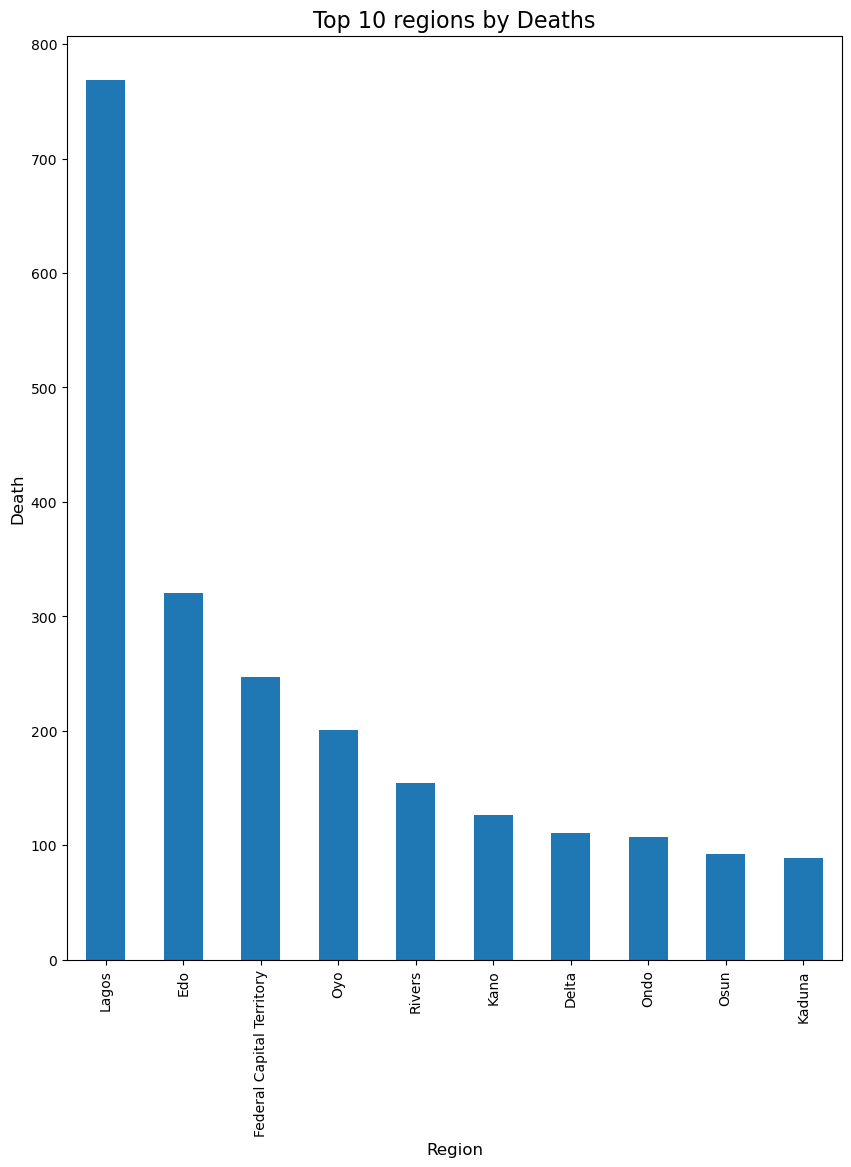

In [88]:
#plotting using matplotlib
plt.figure(figsize=(10, 12))
top_10.plot(kind='bar')
plt.title('Top 10 regions by Deaths', fontsize = 16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Death', fontsize=12)
plt.show()

In [89]:
# The top 10 States with the highest recovery rate
top10_high_recovery_rate= new_covid_data.groupby('Region').sum()
top_10_recovered = top10_high_death_rate['Recovered'].nlargest(10)

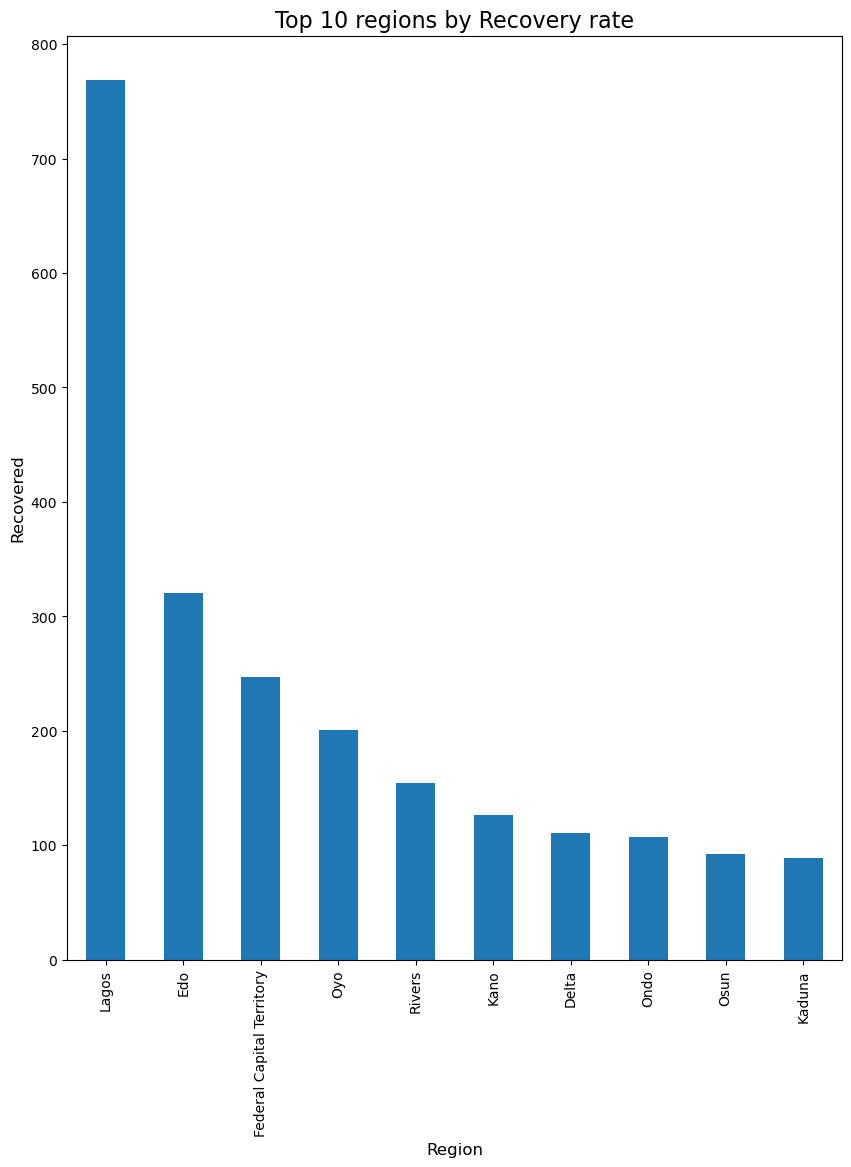

In [90]:
plt.figure(figsize=(10, 12))
top_10.plot(kind='bar')
plt.title('Top 10 regions by Recovery rate', fontsize = 16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Recovered', fontsize=12)
plt.show()